In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

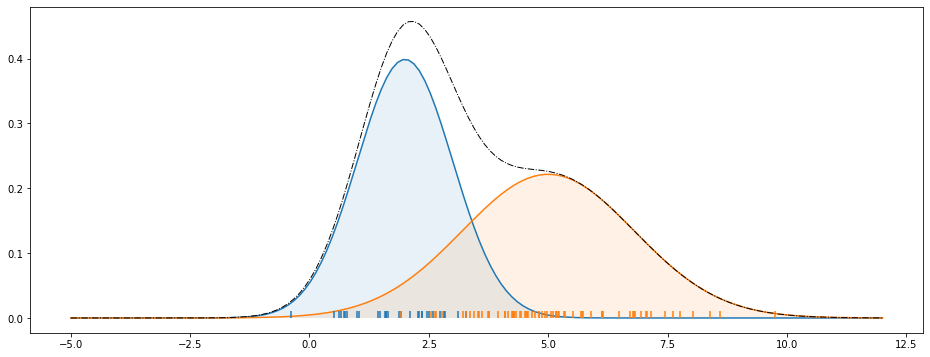

In [39]:
np.random.seed(654)
# draw samples from two Gaussian w.p. z_i ~ Bernoulli(phi)
generative_m = np.array([stats.norm(2,1 ), stats.norm(5, 1.8)])
z_i = stats.bernoulli(0.75).rvs(100)
x_i = np.array([g.rvs() for g in generative_m[z_i]])

x = np.linspace(-5, 12, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, generative_m[0].pdf(x))
plt.plot(x, generative_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x) + generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx(generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(generative_m[1].pdf(x), x, alpha=0.1)
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z_i])

(2, 100)


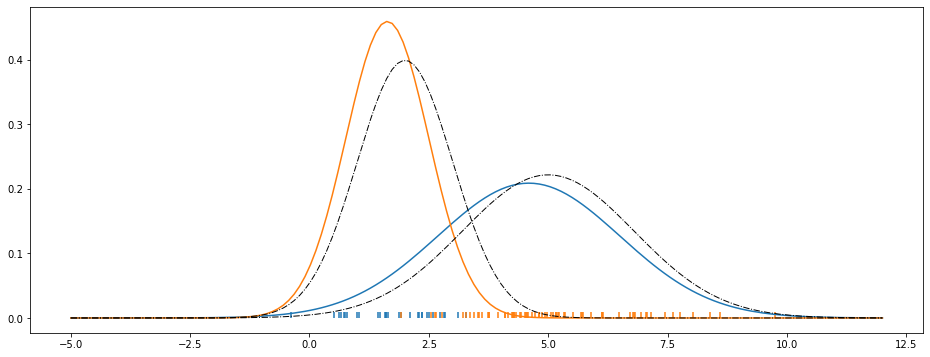

In [71]:
class EM:
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.std = np.ones(k)
        self.w_ij = None
        self.phi = np.ones(k) / k 
        
    def expectation_step(self, x):
        for z_i in range(self.k):
            self.w_ij[z_i] = stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) * self.phi[z_i]
        # normalize so that marginazling z would lead to p = 1
        self.w_ij /= self.w_ij.sum(0)
        
    def maximization_step(self, x):
        self.phi = self.w_ij.mean(1)
        self.std = ((self.w_ij * (x - self.mu[:, None])**2).sum(1) / self.w_ij.sum(1))**(1/2)
        self.mu = (self.w_ij * x).sum(1) / self.w_ij.sum(1)
        
    def fit(self, x):
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.w_ij = np.zeros((self.k, x.shape[0]))
        
        
        last_mu = np.ones(self.k) * np.inf
        while ~np.all(np.isclose(self.mu, last_mu)):
            last_mu = self.mu
            self.expectation_step(x)
            self.maximization_step(x)
        print(self.w_ij.shape)
            
            
m = EM(2)
m.fit(x_i)

fitted_m = [stats.norm(mu, std) for mu, std in zip(m.mu, m.std)]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z_i])
plt.plot(x, fitted_m[0].pdf(x))
plt.plot(x, fitted_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, generative_m[1].pdf(x), color='black', lw=1, ls='-.')


(2, 100)


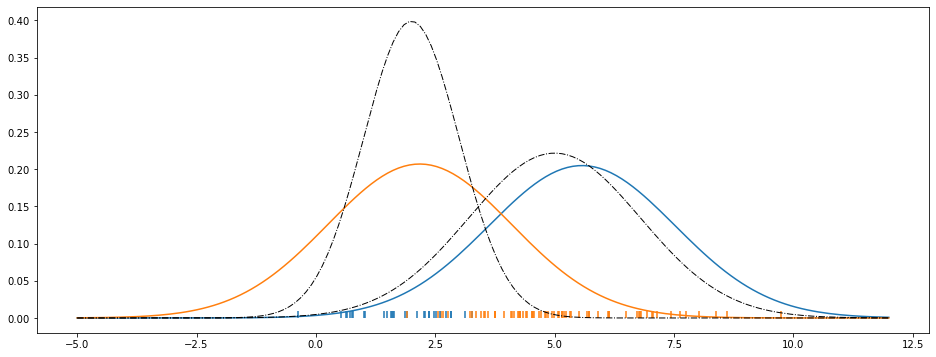